In [8]:
library(dplyr)
library(ggplot2)
library(susieR)
library(stringr)
library(data.table)
library(ggplot2)
library(ggrepel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [59]:
sum.stats <- read.table('simulation_summary_stats/1KGP_hg19_AIRE_1MB.vcf.gz_12/ss_1_CV_20000_ctrl_20000_case.tsv',header=T)

dim(sum.stats)
head(sum.stats)

[1] 3192    6

,snps,z,p.value,log.p.value,CV,OR
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,rs2838366,0.5479634,0.58371701,-0.5383390,0,1
2,rs2838367,-0.8849267,0.37619615,-0.9776446,0,1
3,rs2838368,-0.5590707,0.57611348,-0.5514506,0,1
4,rs2838369,1.7573635,0.07885587,-2.5401335,0,1
5,rs2838370,-0.5515039,0.58128827,-0.5425085,0,1
6,rs2838371,0.6179324,0.53661991,-0.6224652,0,1


In [60]:
dplyr::filter(sum.stats, CV!=0)$snps

[1] "rs112632602"

# Locus Zoom

In [26]:
vcf <- read.table('simulation_summary_stats/1KGP_hg19_AIRE_1MB.vcf.gz_snp_maf_0.05.tsv')
vcf <- select(vcf, chr=V1, pos=V2, snps=V3, ref=V4, alr=V5)

head(vcf)
dim(vcf)

,chr,pos,snps,ref,alr
,<int>,<int>,<chr>,<chr>,<chr>
1,21,45214323,rs2838366,T,C
2,21,45214581,rs2838367,G,A
3,21,45214684,rs2838368,G,A
4,21,45214862,rs2838369,A,G
5,21,45214953,rs2838370,G,T
6,21,45215046,rs2838371,T,C


[1] 3192    5

In [61]:
sum.stats.vcf <- left_join(sum.stats,vcf)

dim(sum.stats.vcf)
head(sum.stats.vcf)

Joining with `by = join_by(snps)`


[1] 3192   10

,snps,z,p.value,log.p.value,CV,OR,chr,pos,ref,alr
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<chr>
1,rs2838366,0.5479634,0.58371701,-0.5383390,0,1,21,45214323,T,C
2,rs2838367,-0.8849267,0.37619615,-0.9776446,0,1,21,45214581,G,A
3,rs2838368,-0.5590707,0.57611348,-0.5514506,0,1,21,45214684,G,A
4,rs2838369,1.7573635,0.07885587,-2.5401335,0,1,21,45214862,A,G
5,rs2838370,-0.5515039,0.58128827,-0.5425085,0,1,21,45214953,G,T
6,rs2838371,0.6179324,0.53661991,-0.6224652,0,1,21,45215046,T,C


In [62]:
sum.stats.vcf$labels <- ""
sum.stats.vcf$labels[sum.stats.vcf$snps==filter(sum.stats.vcf, CV!=0)$snps] <- filter(sum.stats.vcf, CV!=0)$snps

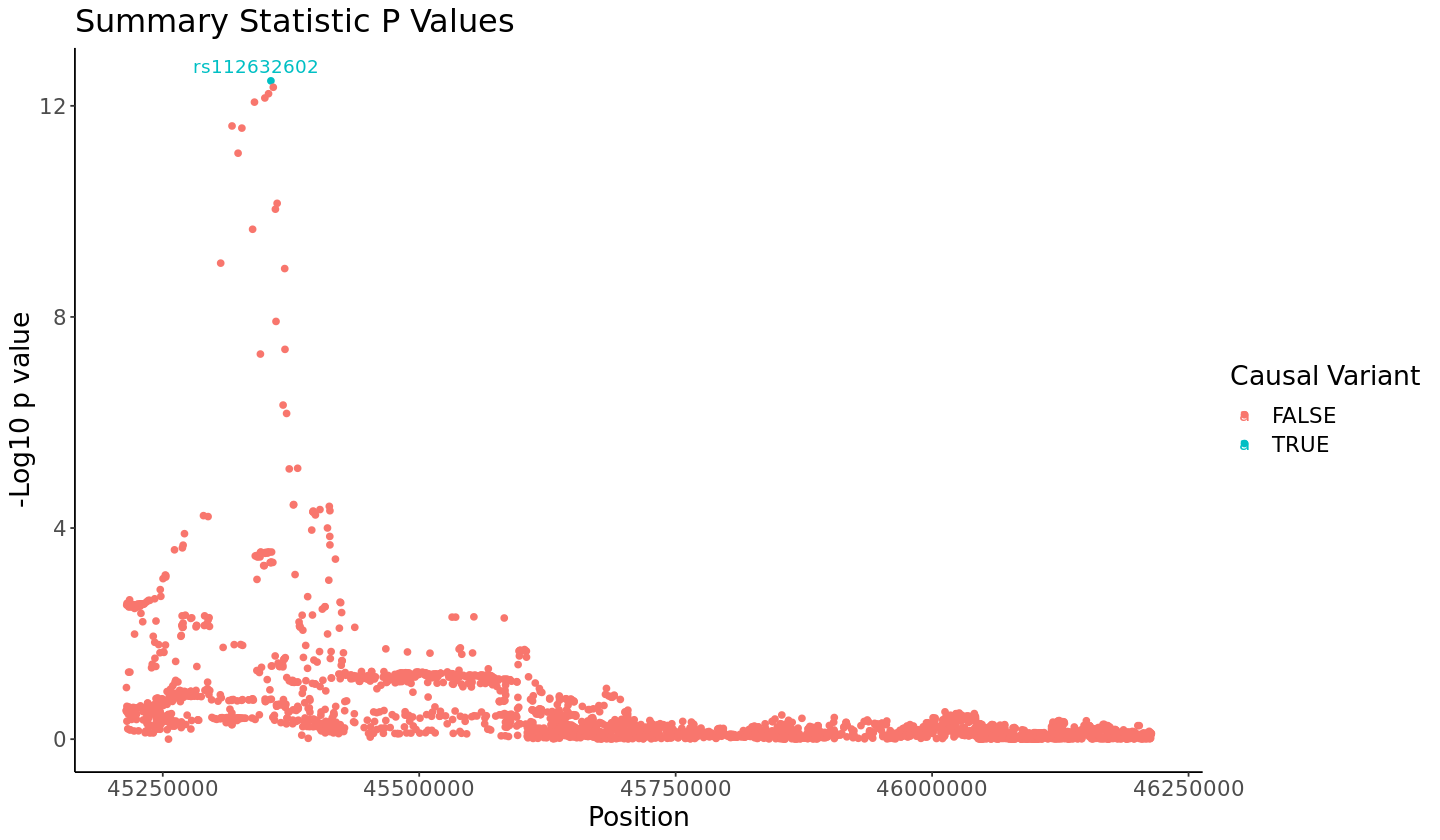

In [63]:
options(repr.plot.width = 12)
ggplot(sum.stats.vcf, aes(x=pos, y=-log.p.value, 
                                       color=snps %in% filter(sum.stats.vcf, CV!=0)$snps, label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('-Log10 p value') + labs(color="Causal Variant") +
    ggtitle("Summary Statistic P Values") +
    geom_text_repel(max.overlaps=40)

In [65]:
filter(sum.stats.vcf, snps %in% filter(sum.stats.vcf, CV!=0)$snps)

snps,z,p.value,log.p.value,CV,OR,chr,pos,ref,alr,labels
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
rs112632602,4.620473,3.828666e-06,-12.47299,1,1.144999,21,45355412,C,T,rs112632602


# Read in FINEMAP

In [66]:
finemap <- read.table("finemapping_results/1KGP_hg19_AIRE_1MB.vcf.gz_12/ss_1_CV_20000_ctrl_20000_case.finemap.snp", header=T)

dim(finemap)
head(finemap)

[1] 3192   16

,index,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,mean,sd,mean_incl,sd_incl
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,450,rs112632602,21,45355412,C,T,0.0583067,4.62047,1,4.62047,0.1848780,2.66153,0.01276250,0.0275668,0.0690317,0.0150350
2,460,rs2838442,21,45357730,A,G,0.0577077,4.59512,1,4.59512,0.1646880,2.60068,0.01136120,0.0263113,0.0689862,0.0151090
3,444,rs73371168,21,45353111,G,A,0.0571086,4.56966,1,4.56966,0.1344360,2.49708,0.00926699,0.0241639,0.0689324,0.0151791
4,434,rs2070545,21,45349509,C,T,0.0567093,4.55263,1,4.55263,0.1236510,2.45539,0.00851975,0.0233044,0.0689014,0.0152241
5,417,rs8134181,21,45339402,G,A,0.0567093,4.53611,1,4.53611,0.1146530,2.41814,0.00787111,0.0224716,0.0686515,0.0152215
6,372,rs8126874,21,45317512,C,T,0.0579073,4.43987,1,4.43987,0.0747109,2.21297,0.00497119,0.0179728,0.0665389,0.0150653


In [67]:
finemap$labels <- ""
finemap$labels[finemap$rsid==dplyr::filter(sum.stats, CV!=0)$snps] <- dplyr::filter(sum.stats, CV!=0)$snps

In [68]:
finemap

index,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,mean,sd,mean_incl,sd_incl,labels
<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
450,rs112632602,21,45355412,C,T,0.0583067,4.62047,1,4.62047,0.184878000,2.66153000,1.27625e-02,0.027566800,0.0690317,0.0150350,rs112632602
460,rs2838442,21,45357730,A,G,0.0577077,4.59512,1,4.59512,0.164688000,2.60068000,1.13612e-02,0.026311300,0.0689862,0.0151090,
444,rs73371168,21,45353111,G,A,0.0571086,4.56966,1,4.56966,0.134436000,2.49708000,9.26699e-03,0.024163900,0.0689324,0.0151791,
434,rs2070545,21,45349509,C,T,0.0567093,4.55263,1,4.55263,0.123651000,2.45539000,8.51975e-03,0.023304400,0.0689014,0.0152241,
417,rs8134181,21,45339402,G,A,0.0567093,4.53611,1,4.53611,0.114653000,2.41814000,7.87111e-03,0.022471600,0.0686515,0.0152215,
372,rs8126874,21,45317512,C,T,0.0579073,4.43987,1,4.43987,0.074710900,2.21297000,4.97119e-03,0.017972800,0.0665389,0.0150653,
403,rs112345012,21,45327109,C,G,0.0577077,4.43114,1,4.43114,0.071897700,2.19499000,4.78234e-03,0.017652200,0.0665160,0.0150886,
390,rs3788076,21,45323412,G,T,0.0561102,4.32757,1,4.32757,0.045937500,1.98846000,3.02030e-03,0.014159600,0.0657481,0.0155011,
469,rs3788083,21,45361501,G,C,0.0583067,4.11344,1,4.11344,0.018806200,1.58841000,1.15257e-03,0.008588260,0.0612866,0.0153820,


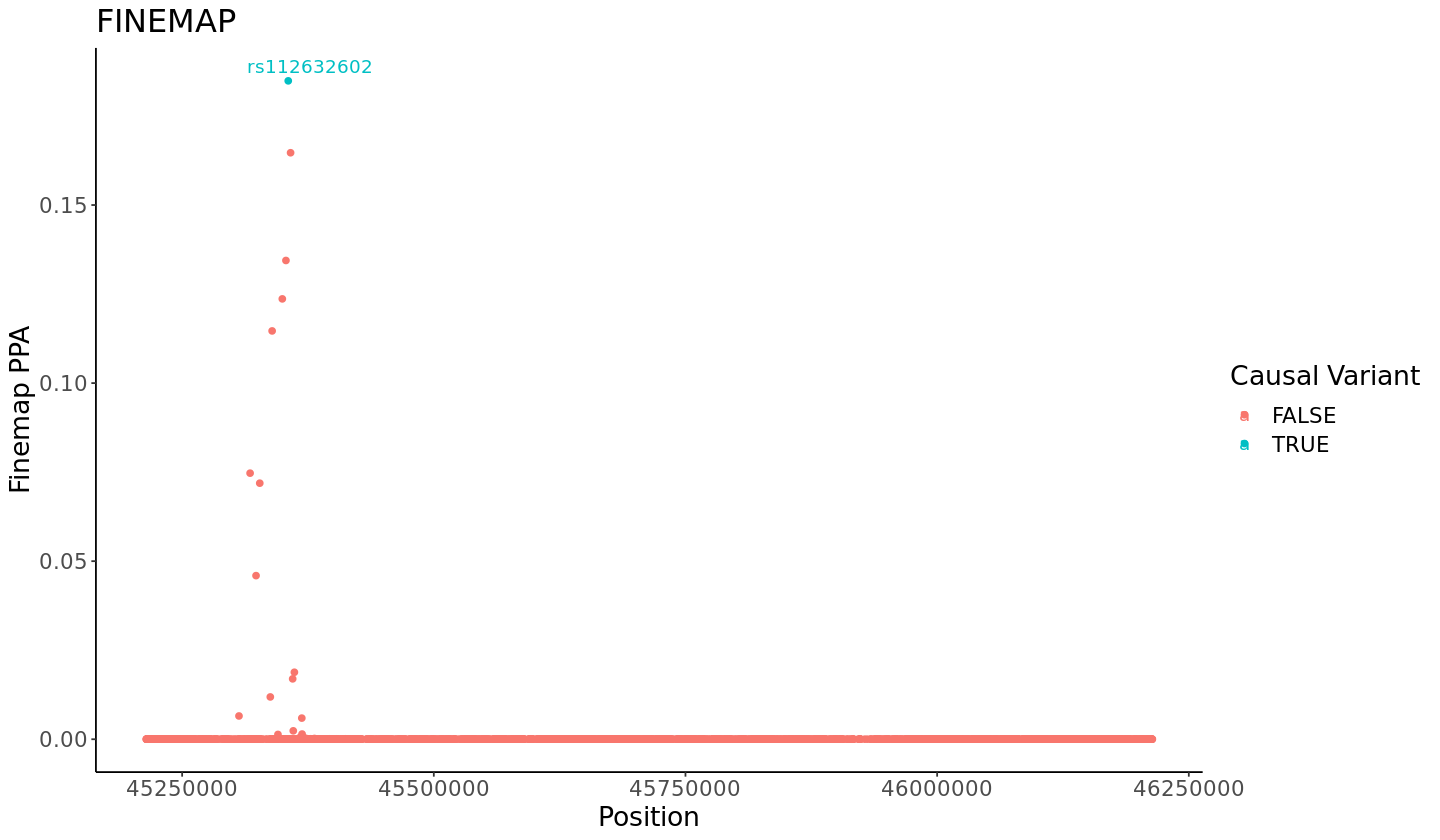

In [69]:
options(repr.plot.width = 12)
ggplot(finemap, aes(x=position, y=prob, 
                                       color=rsid %in% filter(sum.stats, CV!=0)$snps, label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('Finemap PPA') + labs(color="Causal Variant") +
    ggtitle("FINEMAP") +
    geom_text_repel(max.overlaps=40)

In [70]:
filter(finemap, rsid %in% filter(sum.stats, CV!=0)$snps)

index,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,mean,sd,mean_incl,sd_incl,labels
<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
450,rs112632602,21,45355412,C,T,0.0583067,4.62047,1,4.62047,0.184878,2.66153,0.0127625,0.0275668,0.0690317,0.015035,rs112632602


# SuSiE-Inf

In [71]:
susie.inf <- read.table('finemapping_results/1KGP_hg19_AIRE_1MB.vcf.gz_12/ss_1_CV_20000_ctrl_20000_case.inf.susieinf.bgz', header=T, sep='\t')

dim(susie.inf)
head(susie.inf)

[1] 3192   54

,rsid,chromosome,position,allele1,allele2,maf,beta,se,prob,alpha1,⋯,lbf_variable6,lbf_variable7,lbf_variable8,lbf_variable9,lbf_variable10,alpha,post_mean,tausq,sigmasq,cs
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,rs2838366,21,45214323,T,C,0.2745610,0.5479634,1,0.002823172,7.953608e-06,⋯,-0.1063857,-0.1063848,-0.1063842,-0.1063838,-0.1063837,0,-1.893210e-07,0,0.9995756,-1
2,rs2838367,21,45214581,G,A,0.4930110,-0.8849267,1,0.002834532,9.924372e-06,⋯,-0.1030516,-0.1030524,-0.1030530,-0.1030534,-0.1030537,0,-5.904259e-07,0,0.9995756,-1
3,rs2838368,21,45214684,G,A,0.3019170,-0.5590707,1,0.002821835,7.962742e-06,⋯,-0.1068659,-0.1068660,-0.1068661,-0.1068662,-0.1068662,0,-1.081659e-07,0,0.9995756,-1
4,rs2838369,21,45214862,A,G,0.0660942,1.7573635,1,0.002850581,2.916725e-05,⋯,-0.1041636,-0.1041638,-0.1041643,-0.1041650,-0.1041660,0,7.054002e-07,0,0.9995756,-1
5,rs2838370,21,45214953,G,T,0.2807510,-0.5515039,1,0.002822267,7.939981e-06,⋯,-0.1067040,-0.1067044,-0.1067047,-0.1067048,-0.1067049,0,-1.621623e-07,0,0.9995756,-1
6,rs2838371,21,45215046,T,C,0.3134980,0.6179324,1,0.002823237,8.275891e-06,⋯,-0.1064771,-0.1064762,-0.1064756,-0.1064753,-0.1064752,0,-1.683564e-07,0,0.9995756,-1


In [72]:
susie.inf$labels <- ""
susie.inf$labels[susie.inf$rsid==filter(sum.stats, CV!=0)$snps] <- filter(sum.stats, CV!=0)$snps

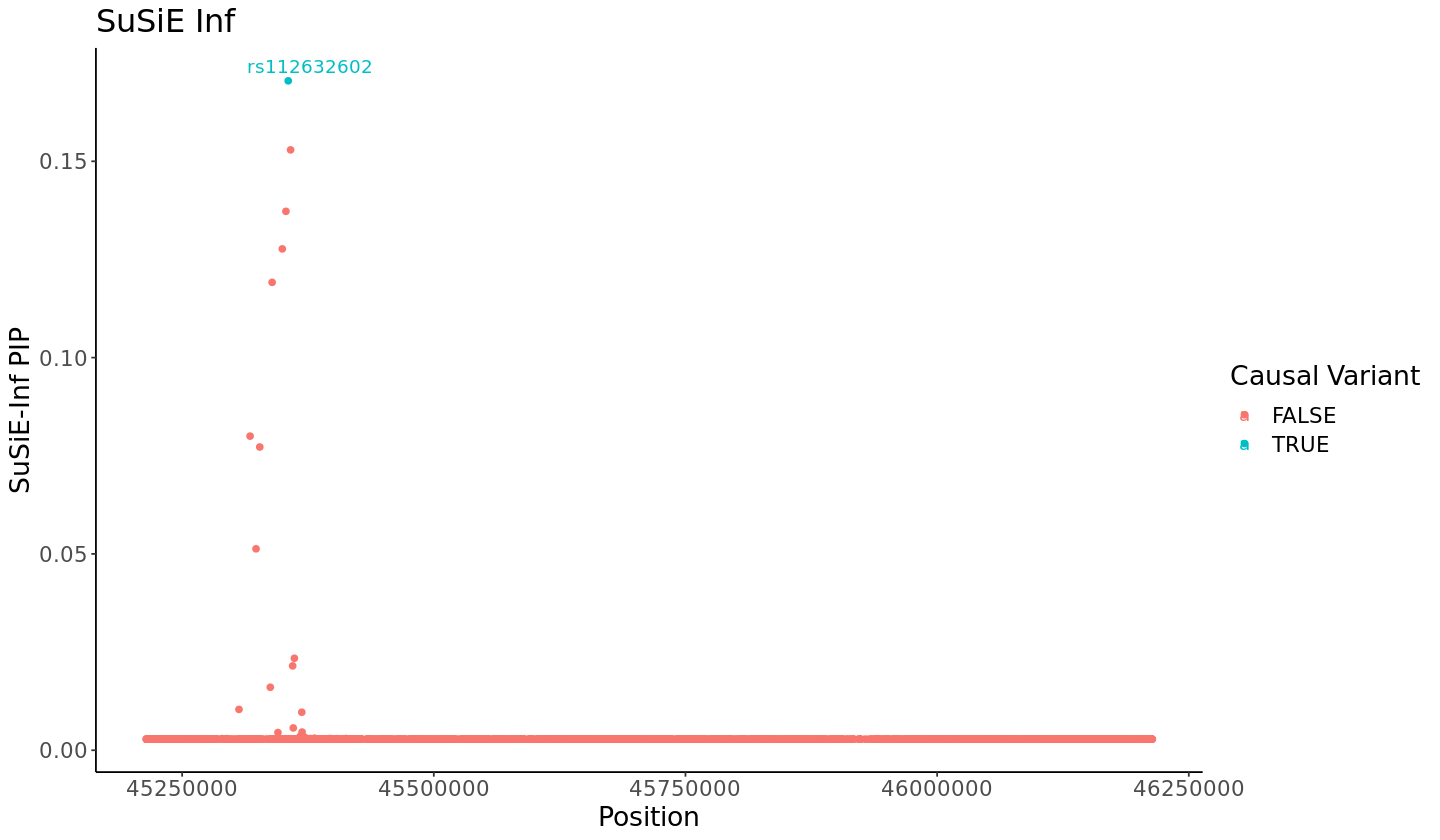

In [73]:
options(repr.plot.width = 12)
ggplot(susie.inf, aes(x=position, y=prob, 
                                       color=rsid %in% filter(sum.stats, CV!=0)$snps, label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('SuSiE-Inf PIP') + labs(color="Causal Variant") +
    ggtitle("SuSiE Inf") +
    geom_text_repel(max.overlaps=40)

In [74]:
filter(susie.inf, rsid %in% filter(sum.stats, CV!=0)$snps) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))


rsid,chromosome,position,allele1,allele2,maf,beta,se,prob,post_mean,tausq,sigmasq,cs,labels
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
rs112632602,21,45355412,C,T,0.0583067,4.620473,1,0.1704873,0.003681078,0,0.9995756,1,rs112632602


# FINEMAP-Inf

In [75]:
finemap.inf <- read.table('finemapping_results/1KGP_hg19_AIRE_1MB.vcf.gz_12/ss_1_CV_20000_ctrl_20000_case.inf.finemapinf.bgz', header=T, sep='\t')

dim(finemap.inf)
head(finemap.inf)

[1] 3192   15

,rsid,chromosome,position,allele1,allele2,maf,beta,se,prob,post_mean_cond,post_sd_cond,alpha,post_mean,tausq,sigmasq
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs2838366,21,45214323,T,C,0.2745610,0.5479634,1,2.815737e-05,-0.0002006040,0.005023823,0,-5.648482e-09,0,0.9995756
2,rs2838367,21,45214581,G,A,0.4930110,-0.8849267,1,2.936721e-05,-0.0014207929,0.005028792,0,-4.172472e-08,0,0.9995756
3,rs2838368,21,45214684,G,A,0.3019170,-0.5590707,1,2.786394e-05,-0.0003626435,0.005008286,0,-1.010468e-08,0,0.9995756
4,rs2838369,21,45214862,A,G,0.0660942,1.7573635,1,4.202060e-05,0.0035772039,0.005220947,0,1.503162e-07,0,0.9995756
5,rs2838370,21,45214953,G,T,0.2807510,-0.5515039,1,2.782711e-05,-0.0004477916,0.005004893,0,-1.246075e-08,0,0.9995756
6,rs2838371,21,45215046,T,C,0.3134980,0.6179324,1,2.839306e-05,-0.0001343958,0.005034342,0,-3.815909e-09,0,0.9995756


In [76]:
finemap.inf$labels <- ""
finemap.inf$labels[finemap.inf$rsid==filter(sum.stats, CV!=0)$snps] <- filter(sum.stats, CV!=0)$snps

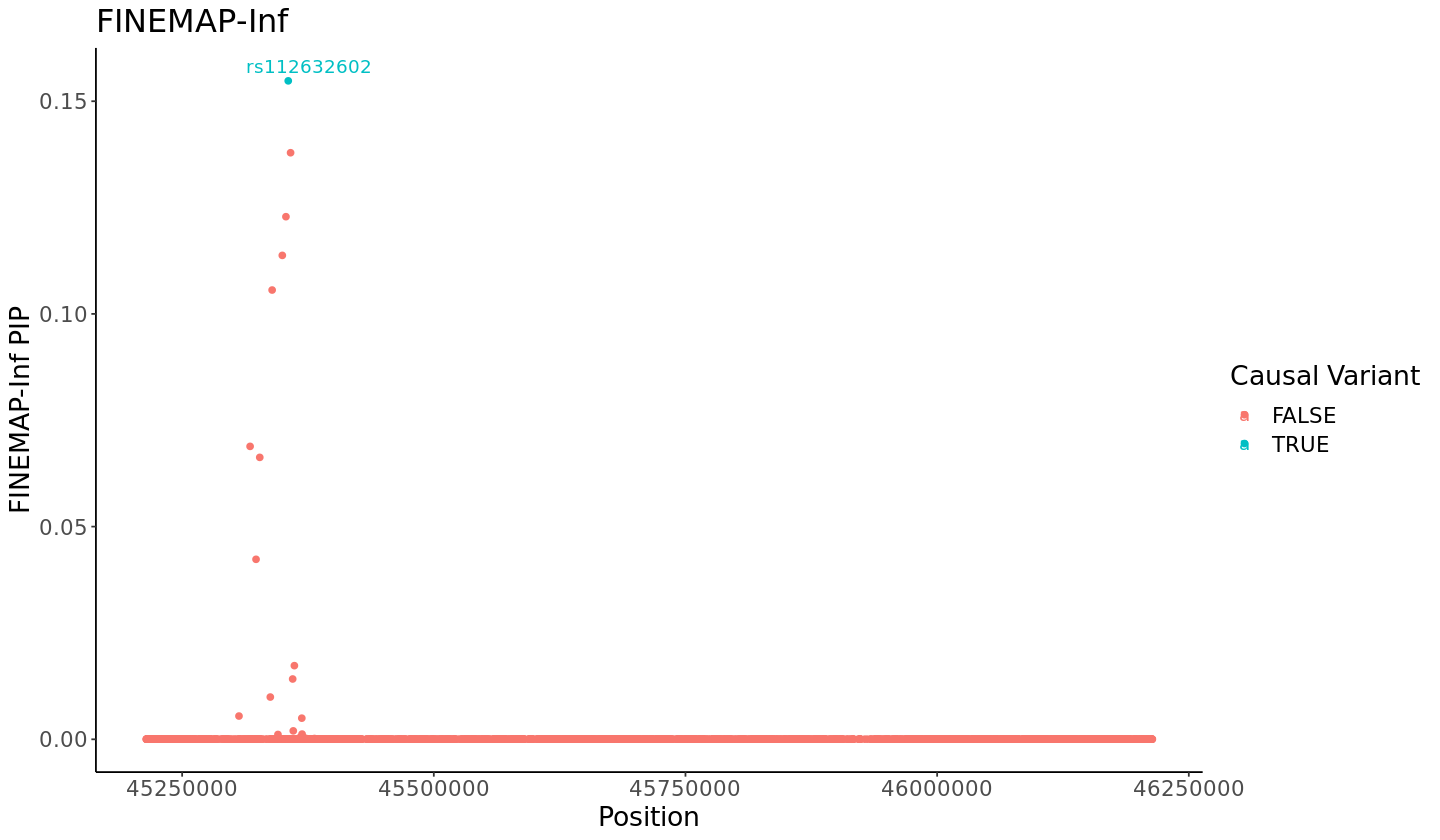

In [77]:
options(repr.plot.width = 12)
ggplot(finemap.inf, aes(x=position, y=prob, 
                                       color=rsid %in% filter(sum.stats, CV!=0)$snps, label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('FINEMAP-Inf PIP') + labs(color="Causal Variant") +
    ggtitle("FINEMAP-Inf") +
    geom_text_repel(max.overlaps=40)

In [78]:
filter(finemap.inf, rsid %in% filter(sum.stats, CV!=0)$snps) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))

rsid,chromosome,position,allele1,allele2,maf,beta,se,prob,post_mean_cond,post_sd_cond,post_mean,tausq,sigmasq,labels
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
rs112632602,21,45355412,C,T,0.0583067,4.620473,1,0.1547877,0.02287236,0.005020333,0.003540361,0,0.9995756,rs112632602


# SuSiE

In [80]:
susie <- read.table('finemapping_results/1KGP_hg19_AIRE_1MB.vcf.gz_12/ss_1_CV_20000_ctrl_20000_case.susie.sum.stat.pip', header=T, sep='\t')

dim(susie)
head(susie)

[1] 3192    7

,snps,z,p.value,log.p.value,CV,OR,pip
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,rs2838366,0.5479634,0.58371701,-0.5383390,0,1,7.759808e-06
2,rs2838367,-0.8849267,0.37619615,-0.9776446,0,1,9.758211e-06
3,rs2838368,-0.5590707,0.57611348,-0.5514506,0,1,7.805225e-06
4,rs2838369,1.7573635,0.07885587,-2.5401335,0,1,2.913948e-05
5,rs2838370,-0.5515039,0.58128827,-0.5425085,0,1,7.774157e-06
6,rs2838371,0.6179324,0.53661991,-0.6224652,0,1,8.066133e-06


In [81]:
susie.vcf <- left_join(susie,vcf)

dim(susie.vcf)
head(susie.vcf)

Joining with `by = join_by(snps)`


[1] 3192   11

,snps,z,p.value,log.p.value,CV,OR,pip,chr,pos,ref,alr
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,rs2838366,0.5479634,0.58371701,-0.5383390,0,1,7.759808e-06,21,45214323,T,C
2,rs2838367,-0.8849267,0.37619615,-0.9776446,0,1,9.758211e-06,21,45214581,G,A
3,rs2838368,-0.5590707,0.57611348,-0.5514506,0,1,7.805225e-06,21,45214684,G,A
4,rs2838369,1.7573635,0.07885587,-2.5401335,0,1,2.913948e-05,21,45214862,A,G
5,rs2838370,-0.5515039,0.58128827,-0.5425085,0,1,7.774157e-06,21,45214953,G,T
6,rs2838371,0.6179324,0.53661991,-0.6224652,0,1,8.066133e-06,21,45215046,T,C


In [82]:
susie.vcf$labels <- ""
susie.vcf$labels[susie.vcf$snps==filter(susie.vcf, CV!=0)$snps] <- filter(susie.vcf, CV!=0)$snps

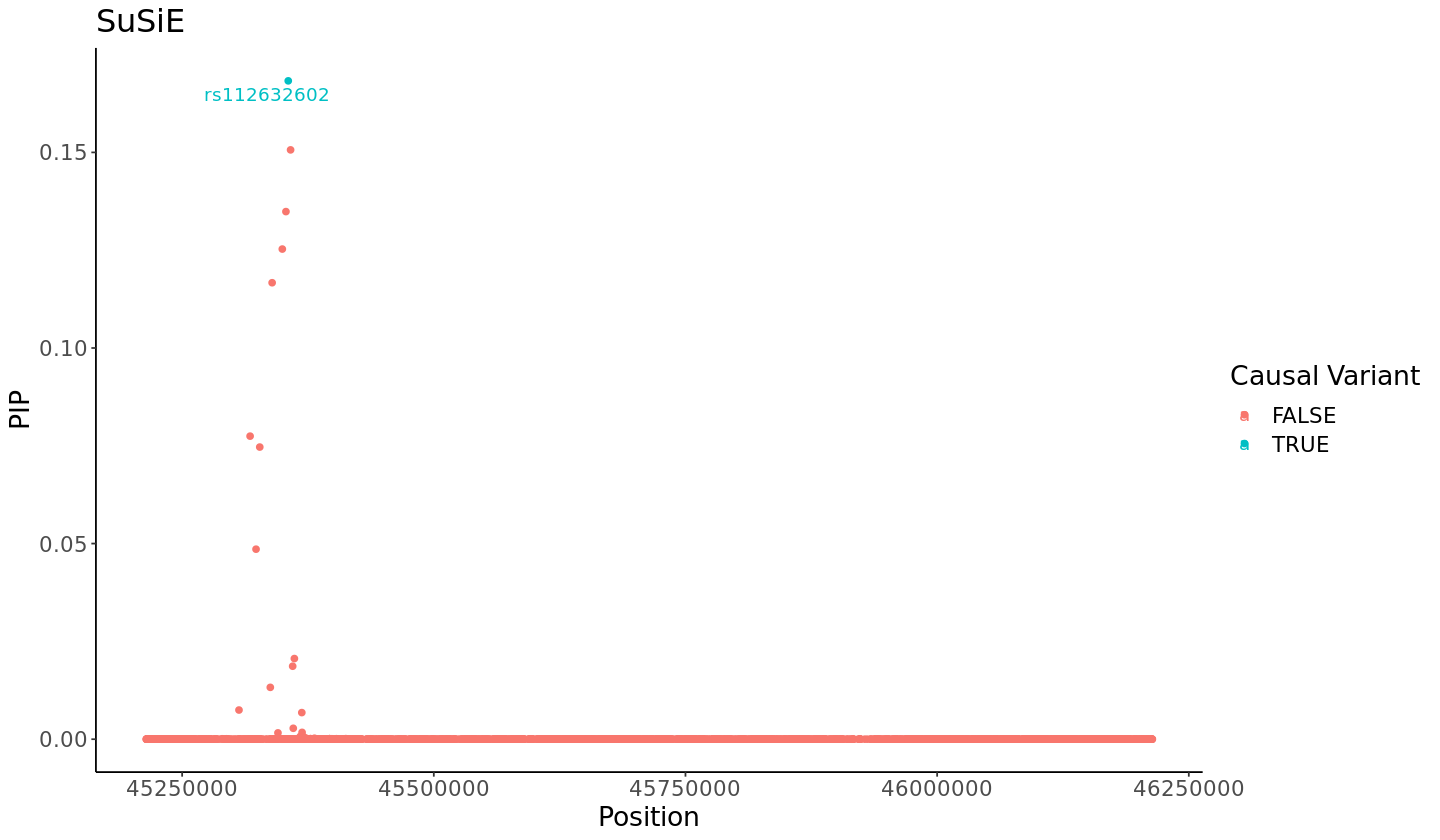

In [85]:
options(repr.plot.width = 12)
ggplot(susie.vcf, aes(x=pos, y=pip, 
                                       color=snps %in% filter(susie.vcf, CV!=0)$snps, label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('PIP') + labs(color="Causal Variant") +
    ggtitle("SuSiE") +
    geom_text_repel(max.overlaps=40)

In [84]:
filter(susie.vcf, snps %in% filter(susie.vcf, CV!=0)$snps) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))

snps,z,p.value,log.p.value,CV,OR,pip,chr,pos,ref,alr,labels
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
rs112632602,4.620473,3.828666e-06,-12.47299,1,1.144999,0.1682877,21,45355412,C,T,rs112632602
